## Analiza danych

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

### Dane

### Dane pod analize

In [52]:
DATA_PATH = 'data/raw/listings.csv'
df = pd.read_csv(DATA_PATH)

columns_of_interests = [
    'price', 'accommodates', 'bedrooms', 'beds',
    'room_type', 'property_type', 'bathrooms',
    'maximum_nights', 'minimum_nights', 'neighbourhood_cleansed'
]
df_filtered = df[columns_of_interests].copy()
df_filtered.rename(columns={
    'neighbourhood_cleansed': 'neighbourhood_cleaned',
    'minimum_nights': 'min_nights',
    'maximum_nights': 'max_nights'
}, inplace=True)

df_filtered['price'] = (
    df_filtered['price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

### Dane pod modele

In [53]:
df_model = df_filtered.copy()
df_model.drop(columns=["max_nights"], inplace=True)
df_model.dropna(inplace=True)

### Analiza danych

#### Zależność liczby łóżek do liczby sypialni

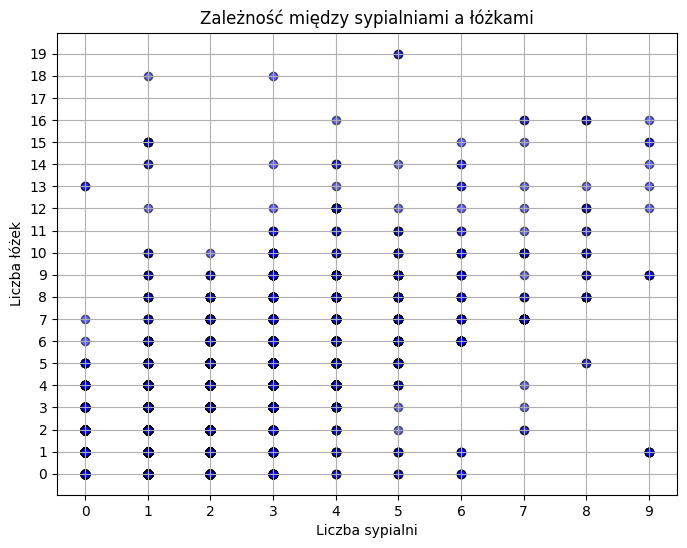

In [54]:
df_plot = df_filtered[(df_filtered['bedrooms'] < 10) & (df_filtered['beds'] < 20)]

plt.figure(figsize=(8, 6))
plt.scatter(df_plot['bedrooms'], df_plot['beds'], alpha=0.6, edgecolors='black', color='blue')

plt.xlabel('Liczba sypialni')
plt.ylabel('Liczba łóżek')
plt.title('Zależność między sypialniami a łóżkami')
plt.grid(True)

plt.xticks(np.arange(0, df_plot['bedrooms'].max() + 1, 1))
plt.yticks(np.arange(0, df_plot['beds'].max() + 1, 1))

plt.show()

#### Liczba sypialni

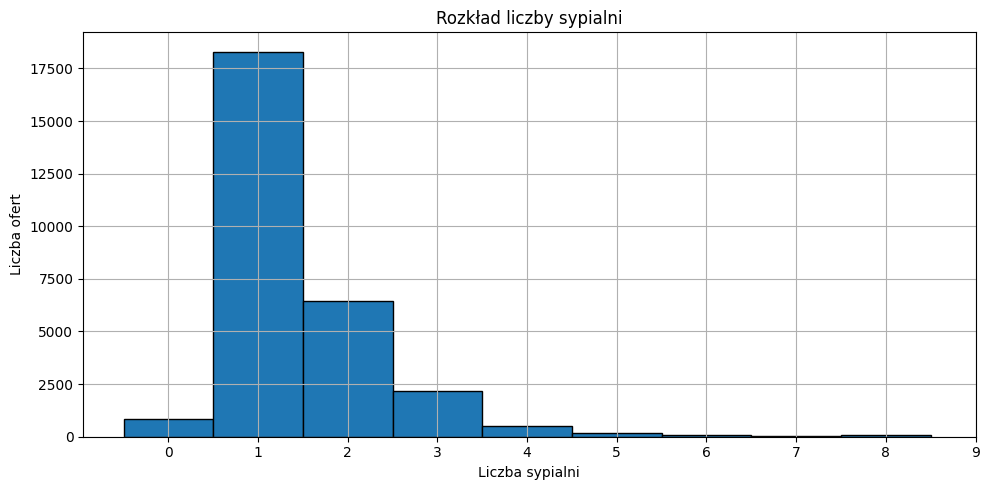

bedrooms
0.0       823
1.0     18298
2.0      6449
3.0      2149
4.0       511
5.0       156
6.0        76
7.0        48
8.0        37
9.0        22
10.0       27
11.0        7
12.0       10
13.0        4
14.0        2
15.0        4
16.0        6
17.0        2
18.0        1
19.0        2
20.0        9
21.0        1
22.0        3
23.0        1
25.0        4
27.0        1
30.0       18
31.0        2
32.0        1
33.0        1
34.0        1
39.0        2
46.0        4
48.0        1
49.0        1
50.0        3
NaN       713
Name: count, dtype: int64


In [55]:
bedrooms_filtered = df_filtered['bedrooms'].dropna()
bins = np.arange(0, 10, 1)

plt.figure(figsize=(10, 5))
plt.hist(bedrooms_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.xlabel('Liczba sypialni')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby sypialni')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['bedrooms'].value_counts(dropna=False).sort_index())

#### Liczba łóżek

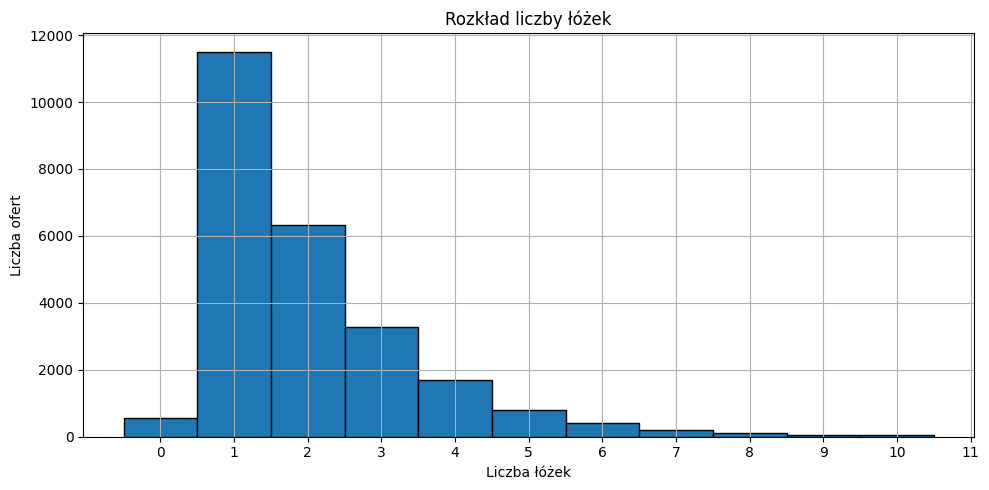

beds
0.0       557
1.0     11492
2.0      6316
3.0      3291
4.0      1699
5.0       788
6.0       397
7.0       190
8.0       112
9.0        64
10.0       48
11.0       17
12.0       23
13.0        8
14.0       12
15.0       11
16.0       12
17.0        1
18.0        3
19.0        3
20.0        7
21.0        4
22.0        2
24.0        1
25.0        3
28.0        1
30.0        1
32.0        3
34.0        1
35.0        1
38.0        1
50.0       21
54.0        1
NaN      4309
Name: count, dtype: int64


In [56]:
beds_filtered = df_filtered['beds'].dropna()
bins = np.arange(0, 12, 1)

plt.figure(figsize=(10, 5))
plt.hist(beds_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.xlabel('Liczba łóżek')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby łóżek')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['beds'].value_counts(dropna=False).sort_index())


#### Zależność liczby możliwych osób a liczbą łóżek

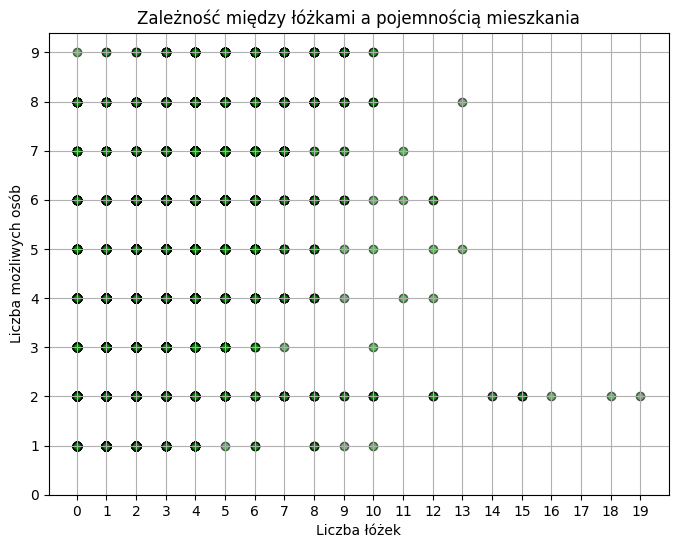

In [57]:
df_plot = df_filtered[
    (df_filtered['accommodates'] < 10) &
    (df_filtered['beds'] < 20) &
    df_filtered['accommodates'].notnull() &
    df_filtered['beds'].notnull()
]

plt.figure(figsize=(8, 6))
plt.scatter(df_plot['beds'], df_plot['accommodates'], alpha=0.6, edgecolors='black', color='green')

plt.xlabel('Liczba łóżek')
plt.ylabel('Liczba możliwych osób')
plt.title('Zależność między łóżkami a pojemnością mieszkania')
plt.grid(True)
plt.xticks(np.arange(0, df_plot['beds'].max() + 1, 1))
plt.yticks(np.arange(0, df_plot['accommodates'].max() + 1, 1))
plt.show()

#### Jakie są wartości zmiennej określającą liczbę łazienek

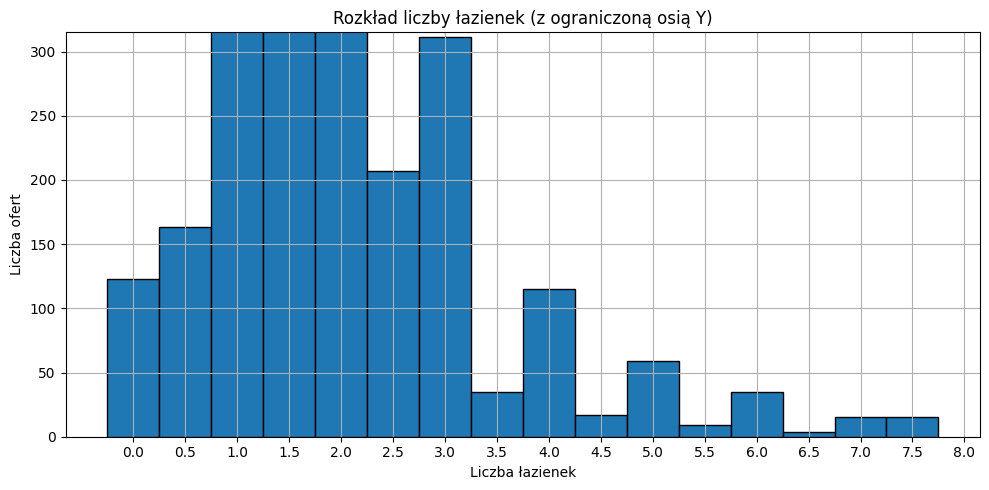

bathrooms
0.0       123
0.5       163
1.0     20468
1.5      1054
2.0      2395
2.5       207
3.0       311
3.5        35
4.0       115
4.5        17
5.0        59
5.5         9
6.0        35
6.5         4
7.0        15
7.5         2
8.0        13
8.5         1
9.0         6
9.5         2
10.0        8
10.5        2
11.0        2
12.0        4
13.0        1
14.0        2
15.0        2
16.0        3
19.0        2
20.0       12
22.0        2
24.0        1
25.0        1
26.0        1
39.0        1
59.0        1
NaN      4321
Name: count, dtype: int64


In [58]:
bath_filtered = df_filtered['bathrooms'].dropna()
bins = np.arange(0, 8.5, 0.5)

plt.figure(figsize=(10, 5))
plt.hist(bath_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.ylim(0, 315)
plt.xlabel('Liczba łazienek')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby łazienek (z ograniczoną osią Y)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['bathrooms'].value_counts(dropna=False).sort_index())

#### Kolumna udogodnienia

In [59]:
amenties = df['amenities'].dropna().apply(ast.literal_eval)

all_amenities = [a.strip() for sublist in amenties for a in sublist]
amenity_counts = Counter(all_amenities)

print('Liczba unikalnych udogodnień:', len(amenity_counts))
print('Top 10 najczęstszych:')
for amenity, count in amenity_counts.most_common(10):
    print(f"{amenity}: {count}")

Liczba unikalnych udogodnień: 4893
Top 10 najczęstszych:
Wifi: 26501
Kitchen: 23992
Hair dryer: 20464
TV: 20174
Iron: 19195
Hot water: 19044
Hangers: 17759
Essentials: 17293
Air conditioning: 17144
Dedicated workspace: 17125


#### Kolumna przedstawiająca dzielnice

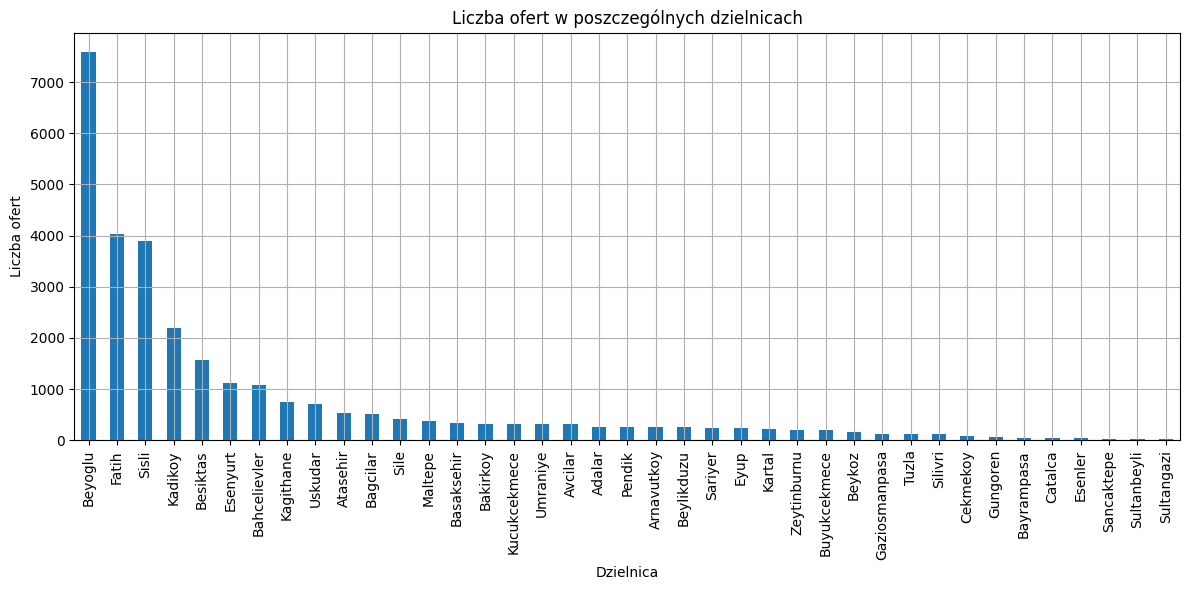

In [60]:
counts = df['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.xlabel('Dzielnica')
plt.ylabel('Liczba ofert')
plt.title('Liczba ofert w poszczególnych dzielnicach')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Mediana 10 najdroższych dzielnic

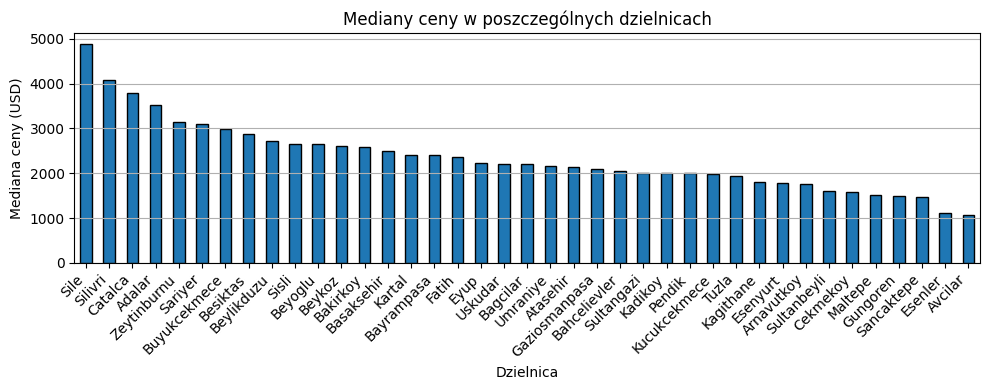

In [61]:
median_price_by_district = (
    df_filtered
    .groupby('neighbourhood_cleaned')['price']
    .median()
    .sort_values(ascending=False)
    .round(2)
)

median_price_by_district.head(40).plot(kind='bar', figsize=(10, 4), edgecolor='black')
plt.title('Mediany ceny w poszczególnych dzielnicach')
plt.xlabel('Dzielnica')
plt.ylabel('Mediana ceny (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Mediana dla 10 najpopularniejszych dzielnic

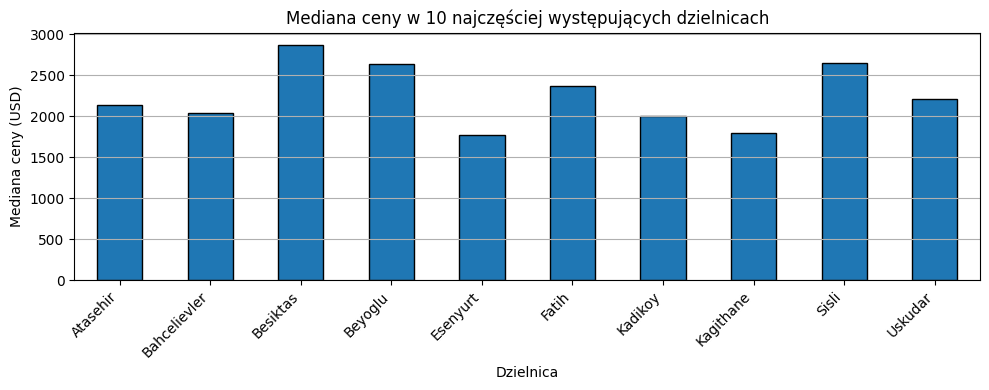

In [62]:
top_districts_by_count = (
    df_filtered['neighbourhood_cleaned']
    .value_counts()
    .head(10)
    .index
)

median_top_districts = (
    df_filtered[df_filtered['neighbourhood_cleaned'].isin(top_districts_by_count)]
    .groupby('neighbourhood_cleaned')['price']
    .median()
    .round(2)
)

median_top_districts.plot(kind='bar', figsize=(10, 4), edgecolor='black')
plt.title('Mediana ceny w 10 najczęściej występujących dzielnicach')
plt.xlabel('Dzielnica')
plt.ylabel('Mediana ceny (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Obserwacje:
- popularniejsze są tańsze dzielnice, te luksowe są rzadziej wybierane, dlatego mamy mniej danych
- **wydaje się średnio możliwe aby ceny określały ceny za noc, bardziej to są ceny za miesiąc albo jeszcze jakieś inne albo mamy doczynienia z bardzo luksusowaymi lokalami** <- WAŻNA WĄTPLIWOŚĆ

#### Liczba osób, które zmieszczą się w mieszkaniu

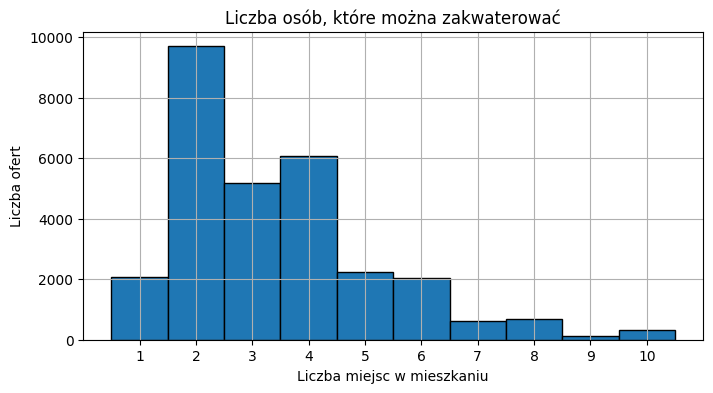

accommodates
1     2088
2     9689
3     5168
4     6059
5     2231
6     2049
7      626
8      668
9      139
10     281
11      33
12     110
13      12
14      32
15      27
16     188
Name: count, dtype: int64


In [63]:
plt.figure(figsize=(8, 4))
df_filtered['accommodates'].dropna().hist(bins=range(1, 12), edgecolor='black', align='left')
plt.title('Liczba osób, które można zakwaterować')
plt.xlabel('Liczba miejsc w mieszkaniu')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print(df_filtered['accommodates'].value_counts(dropna=False).sort_index())

#### Minimalna liczba nocy

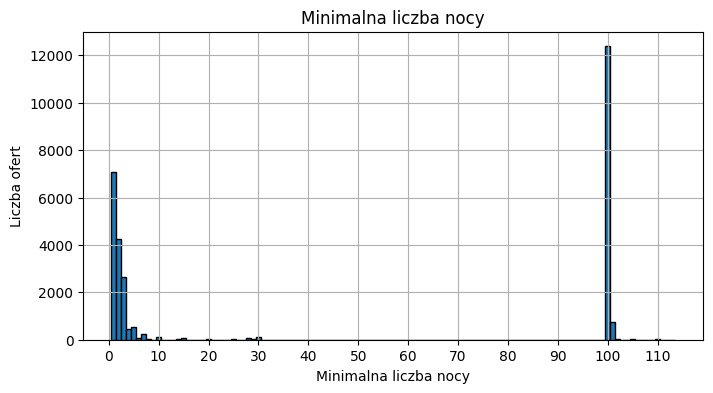

min_nights
1       7068
2       4252
3       2641
4        443
5        519
        ... 
600        1
700        1
730        3
999       22
1000       1
Name: count, Length: 77, dtype: int64


In [76]:
plt.figure(figsize=(8, 4))
df_filtered[df_filtered['min_nights'] <= 115]['min_nights'].dropna().hist(bins=range(1, 115), edgecolor='black', align='left')
plt.title('Minimalna liczba nocy')
plt.xlabel('Minimalna liczba nocy')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(0, 115, 10))
plt.show()

print(df_filtered['min_nights'].value_counts(dropna=False).sort_index())

In [77]:
not_integer_min = df_filtered['min_nights'].dropna().apply(lambda x: not float(x).is_integer())
print("Niecałkowite min_nights:", not_integer_min.sum())

Niecałkowite min_nights: 0


#### Maksymalna liczba nocy

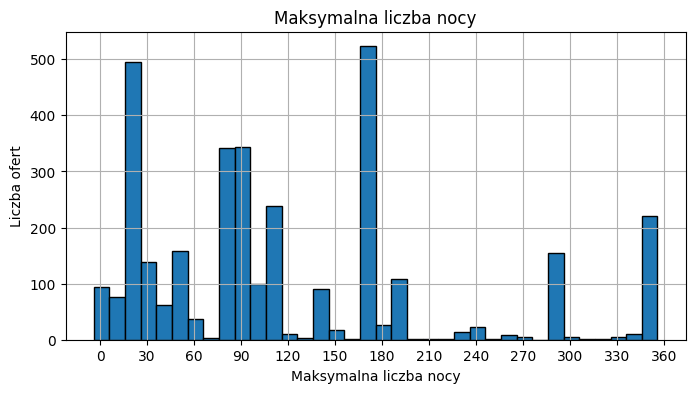

max_nights
1        7
2        2
3        7
4        2
5       16
        ..
1200     1
1222     1
3333     1
5000     1
9999     4
Name: count, Length: 168, dtype: int64


In [78]:
plt.figure(figsize=(8, 4))
df_filtered[df_filtered['max_nights'] <= 365]['max_nights'].dropna().hist(bins=range(1, 366, 10), edgecolor='black', align='left')
plt.title('Maksymalna liczba nocy')
plt.xlabel('Maksymalna liczba nocy')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(0, 366, 30))
plt.show()

print(df_filtered['max_nights'].value_counts(dropna=False).sort_index())

In [79]:
not_integer_max = df_filtered['max_nights'].dropna().apply(lambda x: not float(x).is_integer())
print("Niecałkowite max_nights:", not_integer_max.sum())

Niecałkowite max_nights: 0


#### Typ pokoju

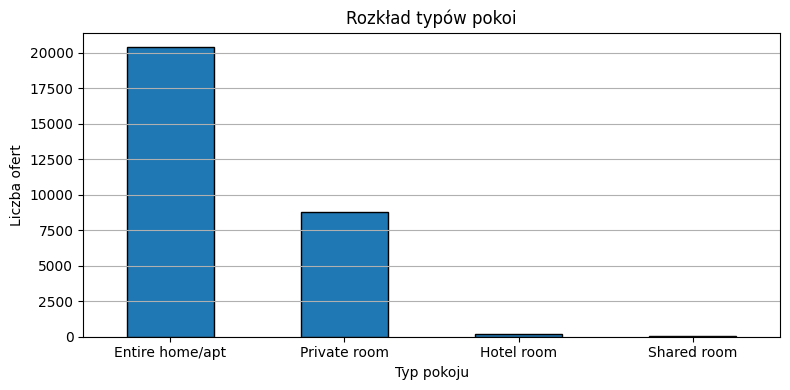

room_type
Entire home/apt    20379
Hotel room           161
Private room        8789
Shared room           71
Name: count, dtype: int64


In [80]:
room_counts = df_filtered['room_type'].value_counts()

plt.figure(figsize=(8, 4))
room_counts.plot(kind='bar', edgecolor='black')
plt.title('Rozkład typów pokoi')
plt.xlabel('Typ pokoju')
plt.ylabel('Liczba ofert')
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

room_counts

print(df_filtered['room_type'].value_counts(dropna=False).sort_index())


#### Typ nieruchomości

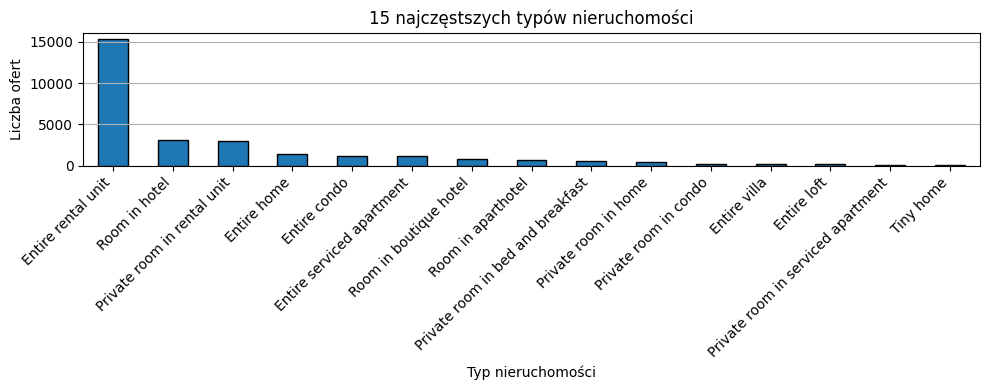

87
property_type
Barn                4
Boat               33
Camper/RV          56
Casa particular     7
Castle              4
                   ..
Tent                1
Tiny home          59
Tower              11
Treehouse          43
Yurt                1
Name: count, Length: 87, dtype: int64


In [81]:
property_counts = df_filtered['property_type'].value_counts().head(15)

plt.figure(figsize=(10, 4))
property_counts.plot(kind='bar', edgecolor='black')
plt.title('15 najczęstszych typów nieruchomości')
plt.xlabel('Typ nieruchomości')
plt.ylabel('Liczba ofert')
plt.grid(True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(df_filtered['property_type'].dropna().unique().size)
print(df_filtered['property_type'].value_counts(dropna=False).sort_index())

#### Zmienna celu

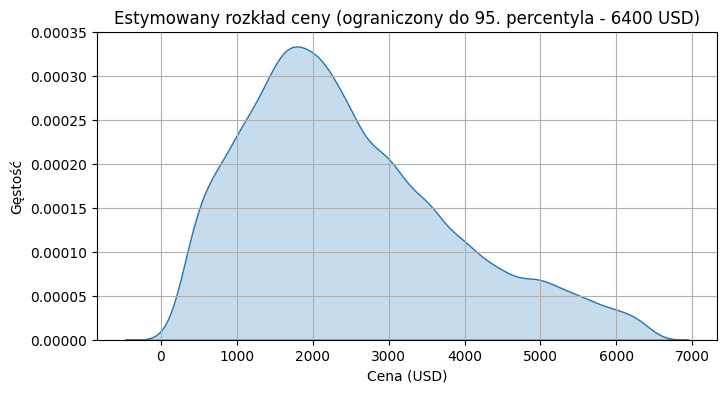

,price
0.50,2400.0
0.75,3835.0
0.90,6385.4
0.95,9553.0
0.99,22940.0


In [84]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_filtered[df_filtered['price'] <= 6400]['price'], fill=True)
plt.title('Estymowany rozkład ceny (ograniczony do 95. percentyla - 6400 USD)')
plt.xlabel('Cena (USD)')
plt.ylabel('Gęstość')
plt.grid(True)
plt.show()

df_filtered['price'].quantile([0.5, 0.75, 0.9, 0.95, 0.99])

#### Statystyki opisowe zmiennych, które weźmiemy pod uwagę

In [85]:
desc = df_filtered[['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights', 'max_nights']].describe()
desc.loc[['count', 'mean', 'std', 'min', 'max']].round(2)

,price,accommodates,bedrooms,beds,bathrooms,min_nights,max_nights
count,25155.00,29400.00,28687.00,25091.00,25079.00,29400.00,29400.00
mean,4065.96,3.54,1.54,2.13,1.22,51.49,482.24
std,30621.86,2.18,1.68,2.27,0.98,63.89,332.57
min,80.00,1.00,0.00,0.00,0.00,1.00,1.00
max,3456384.00,16.00,50.00,54.00,59.00,1000.00,9999.00


### Braki w danych

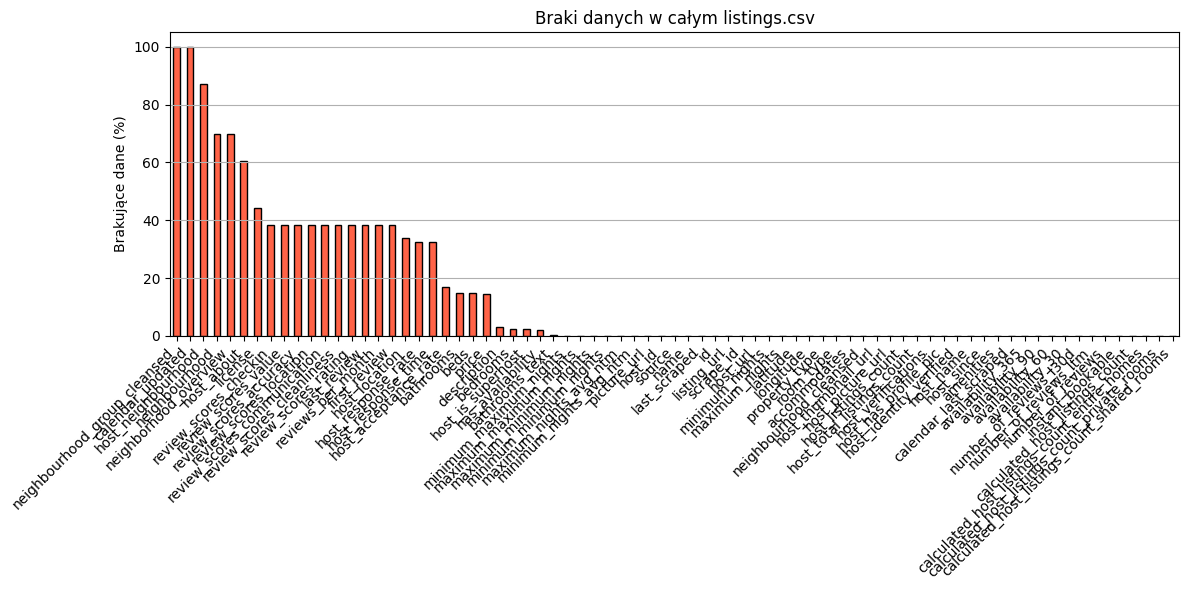

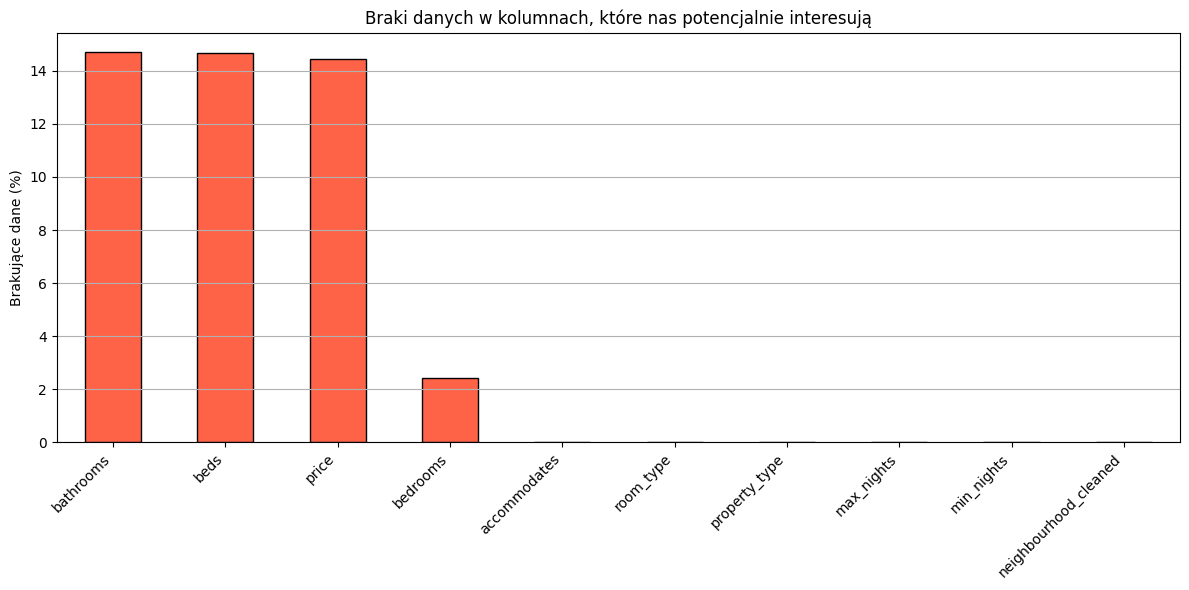

In [87]:
def plot_missing_percentage(df, title):
    missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_percent = missing_percent

    plt.figure(figsize=(12, 6))
    missing_percent.plot(kind='bar', edgecolor='black', color='tomato')
    plt.title(title)
    plt.ylabel('Brakujące dane (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_missing_percentage(df, 'Braki danych w całym listings.csv')
plot_missing_percentage(df_filtered, 'Braki danych w kolumnach, które nas potencjalnie interesują')

### Mierzenie *korelacji*

##### Dla liczbowych atrybutów

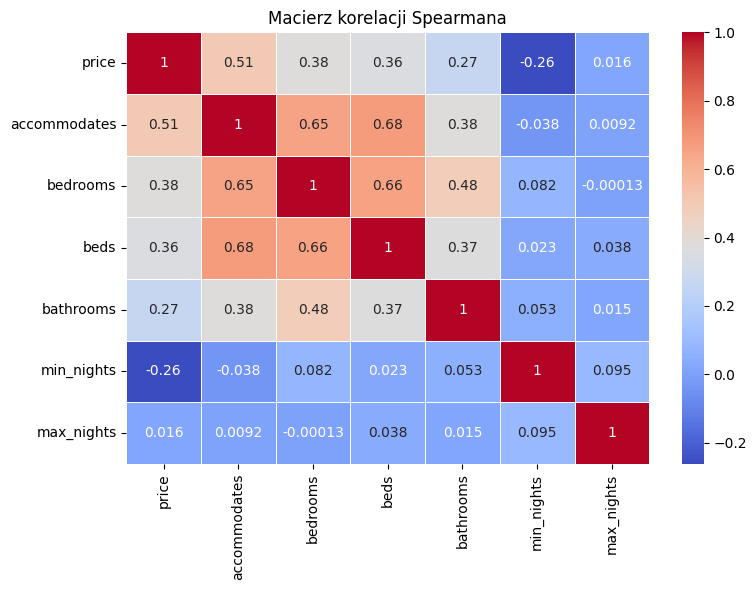

In [88]:
numeric_cols = ['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights', 'max_nights']
correlation_matrix = df_filtered[numeric_cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji Spearmana')
plt.tight_layout()
plt.show()

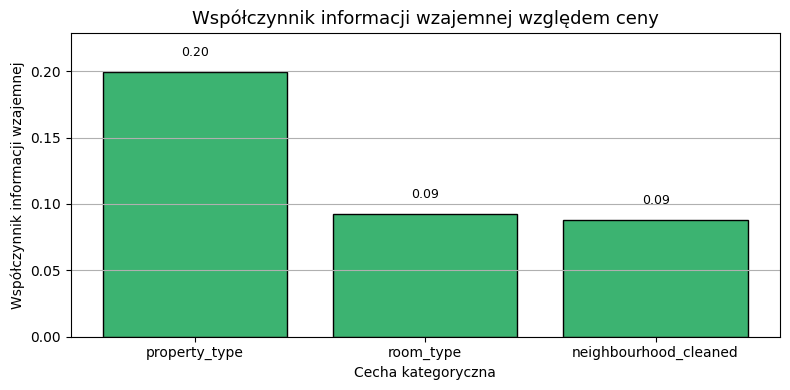

In [89]:
df_temp = df_filtered.copy()
df_temp['price_binned'] = pd.qcut(df_temp['price'], q=20, duplicates='drop')

categorical_columns = ['room_type', 'property_type', 'neighbourhood_cleaned']
mi_scores = {}

for column in categorical_columns:
    contingency = pd.crosstab(df_temp[column].fillna('missing'), df_temp['price_binned'])
    mi = mutual_info_score(None, None, contingency=contingency.to_numpy())
    mi_scores[column] = mi

mi_series = pd.Series(mi_scores).sort_values(ascending=False).round(4)

plt.figure(figsize=(8, 4))
bars = plt.bar(mi_series.index, mi_series.values, color='mediumseagreen', edgecolor='black')

plt.title('Współczynnik informacji wzajemnej względem ceny', fontsize=13)
plt.ylabel('Współczynnik informacji wzajemnej')
plt.xlabel('Cecha kategoryczna')
plt.grid(axis='y')

plt.ylim(0, mi_series.max() * 1.15)

for rect in bars:
    value = rect.get_height()
    center = rect.get_x() + rect.get_width() / 2
    plt.text(center, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Modele

### Podział danych

In [109]:
X = df_model.drop(columns=['price'])
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# treningowe (80%): X_train, y_train
# testujący (20%): X_test, y_test

cutoff = np.percentile(y_test, 95)
mask = y_test <= cutoff
y_test = y_test[mask]
X_test = X_test[mask]

### Model naiwny

In [110]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Model naiwny: mae: {mae:.2f}, rmse: {rmse:.2f}')

Model naiwny: mae: 1315.04, rmse: 1826.12


### Inne modele

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

categorical_features = ['room_type', 'property_type', 'neighbourhood_cleaned']
numeric_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights']

### Model bazowy

In [101]:
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

model = Pipeline([
    ('prep', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Model bazowy: mae: {mae:.2f}, rmse:{rmse:.2f}')

Model bazowy: mae: 1713.31, rmse:2641.19


### Model zaawansowany

Przy modelu zaawansowanym oprócz po prostu nauczenia modelu nieliniowej regresji, próbowaliśmy przygotować odpowiednio dane, aby poprawić predykcję

#### Zabawa z pewnymi transformacjami

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin

def select_top_categories(df, column, target, n_top_popular=5, n_top_expensive=5):
    counts = df[column].value_counts()
    medians = df.groupby(column)[target].median()

    top_popular = counts.nlargest(n_top_popular).index
    top_expensive = medians.nlargest(n_top_expensive).index

    top_categories = set(top_popular).union(set(top_expensive))
    return top_categories

class CustomNeighbourhoodMedianEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column='neighbourhood_cleaned', target='price',
                 n_top_popular=7, n_top_expensive=2):
        self.column = column
        self.target = target
        self.n_top_popular = n_top_popular
        self.n_top_expensive = n_top_expensive
        self._medians = None
        self._global_median = None
        self._top_categories = None

    def fit(self, X, y):
        df = X.copy()
        df[self.target] = y

        self._top_categories = select_top_categories(
            df, self.column, self.target,
            n_top_popular=self.n_top_popular,
            n_top_expensive=self.n_top_expensive
        )

        df[self.column] = df[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )

        self._medians = df.groupby(self.column)[self.target].median()
        self._global_median = y.median()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )

        X[f'{self.column}_encoded'] = X[self.column].map(self._medians)
        X[f'{self.column}_encoded'] = X[f'{self.column}_encoded'].fillna(self._global_median)

        return X.drop(columns=[self.column])

class PropertyTypeGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, column='property_type', top_n=6):
        self.column = column
        self.top_n = top_n
        self._top_categories = None

    def fit(self, X, y=None):
        counts = X[self.column].value_counts()
        self._top_categories = counts.nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )
        return X


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

categorical_features = ['room_type', 'property_type']
numeric_features = [
    'accommodates', 'bedrooms', 'beds', 'bathrooms',
    'min_nights', 'neighbourhood_cleaned_encoded'
]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

model = Pipeline([
    ('encode_district', CustomNeighbourhoodMedianEncoder()),
    ('group_property_type', PropertyTypeGrouper()),
    ('prep', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(
        n_estimators=258,
        max_depth=25,
        min_samples_split=8,
        random_state=144),
        func=np.log1p,
        inverse_func=np.expm1))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Model docelowy: mae: {mae:.2f}, rmse: {rmse:.2f}')

Model docelowy: mae: 1051.03, rmse: 1606.03


#### Strojenie hiperparametrów

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'regressor__regressor__n_estimators': randint(50, 300),
    'regressor__regressor__max_depth': [None] + list(range(5, 30)),
    'regressor__regressor__min_samples_split': randint(2, 15)
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=123
)

random_search.fit(X_train, y_train)
print("Najlepsze parametry:", random_search.best_params_)

Najlepsze parametry: {'regressor__regressor__max_depth': 25, 'regressor__regressor__min_samples_split': 8, 'regressor__regressor__n_estimators': 144}


## Podsumowanie wyników na nowych danych

### Model naiwny

`MAE: 1315.04, RMSE: 1826.12`

### Model bazowy

`MAE: 1713.31, RMSE:2641.19`

### Model zaawansowany

`MAE: 1051.03, RMSE: 1606.03`